In [1]:
%load_ext autoreload
%autoreload 2

# check pytorch version
import pandas as pd
!pip install pytorch==1.4.0
import torch
print(torch.__version__)
! pip install torch-lr-finder --quiet
# from numpy import vstack
from numpy import argmax
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
torch.backends.cudnn.benchmark = True

ERROR: Could not find a version that satisfies the requirement pytorch==1.4.0 (from versions: 0.1.2, 1.0.2)
ERROR: No matching distribution found for pytorch==1.4.0
1.10.0+cu111


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# import torch
# torch.cuda.is_available()
import sys
sys.path.append('/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/')
from src.utils import *
from src.plot_utils import *
from src.model import FC_10, ModularFC
!pip install livelossplot --quiet
from src.trainManager import *

device = get_default_device()

train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)
criterion = CrossEntropyLoss()

<class 'src.helenaDataset.helenaDataset'> <src.helenaDataset.helenaDataset object at 0x7fbb173fd510>


In [ ]:

# train_dl, val_dl, test_dl = prepare_data('cnae-9', 512, 512, 1024)
# criterion = CrossEntropyLoss()

# Normal distribution

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.07E+00


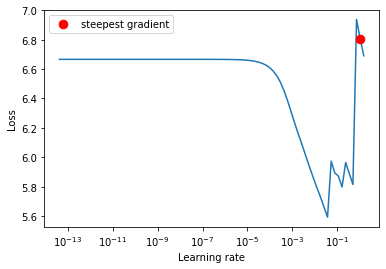

In [ ]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [20,25,30,35,40,40,35,30,25,20]

# model = FC_10(27, 100, dimList)
model = ModularFC(27, dimList, 100)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cuda')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

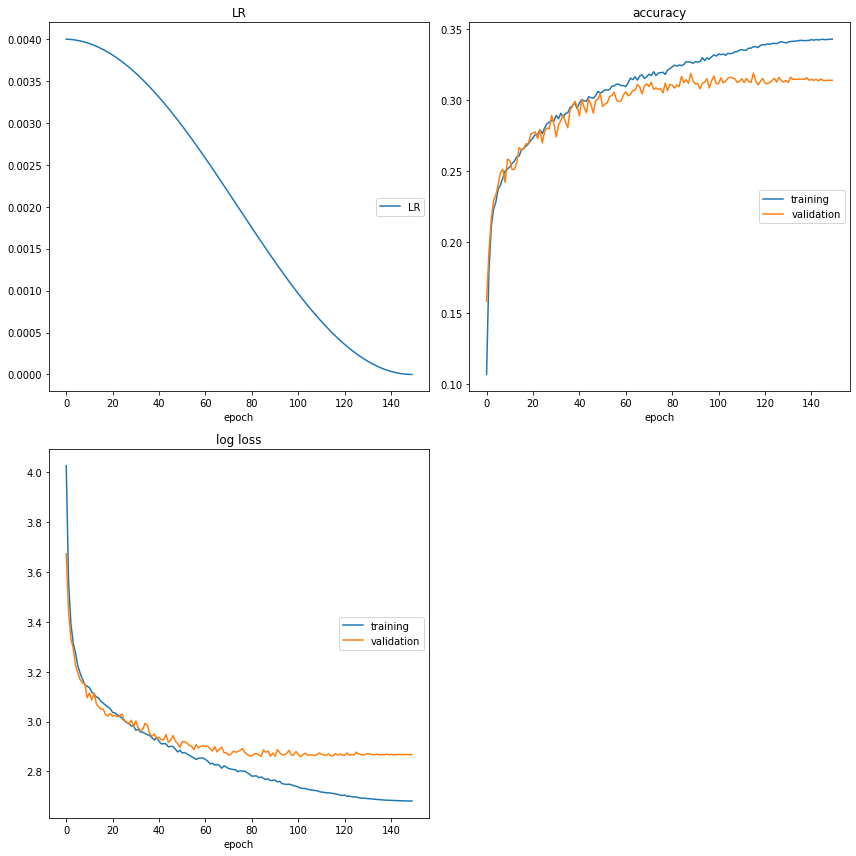

LR
	LR               	 (min:    0.000, max:    0.004, cur:    0.000)
accuracy
	training         	 (min:    0.107, max:    0.343, cur:    0.343)
	validation       	 (min:    0.159, max:    0.319, cur:    0.314)
log loss
	training         	 (min:    2.681, max:    4.027, cur:    2.681)
	validation       	 (min:    2.859, max:    3.673, cur:    2.867)


In [ ]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [4E-03]
num_epochs = 150
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/src/utils.py:120: RuntimeWarning: invalid value encountered in true_divide
  avg_saliency = avg_saliency / row_sums[:, np.newaxis]


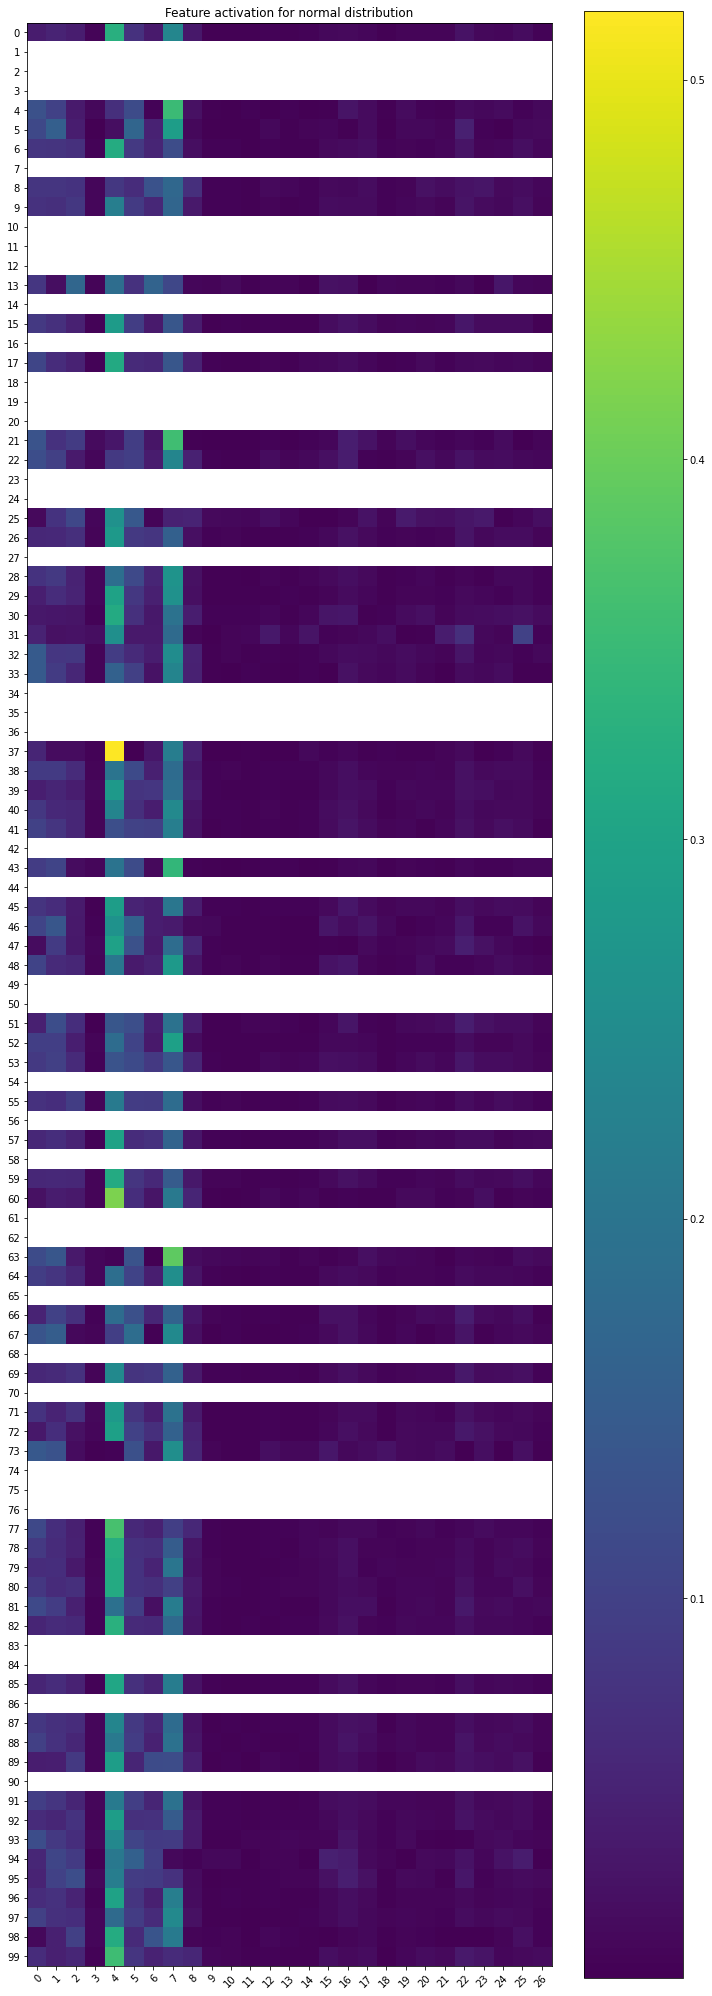

In [ ]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test')
plot_saliency_by_features(avg_saliency, 100, 27, fig_title='Feature activation for normal distribution')

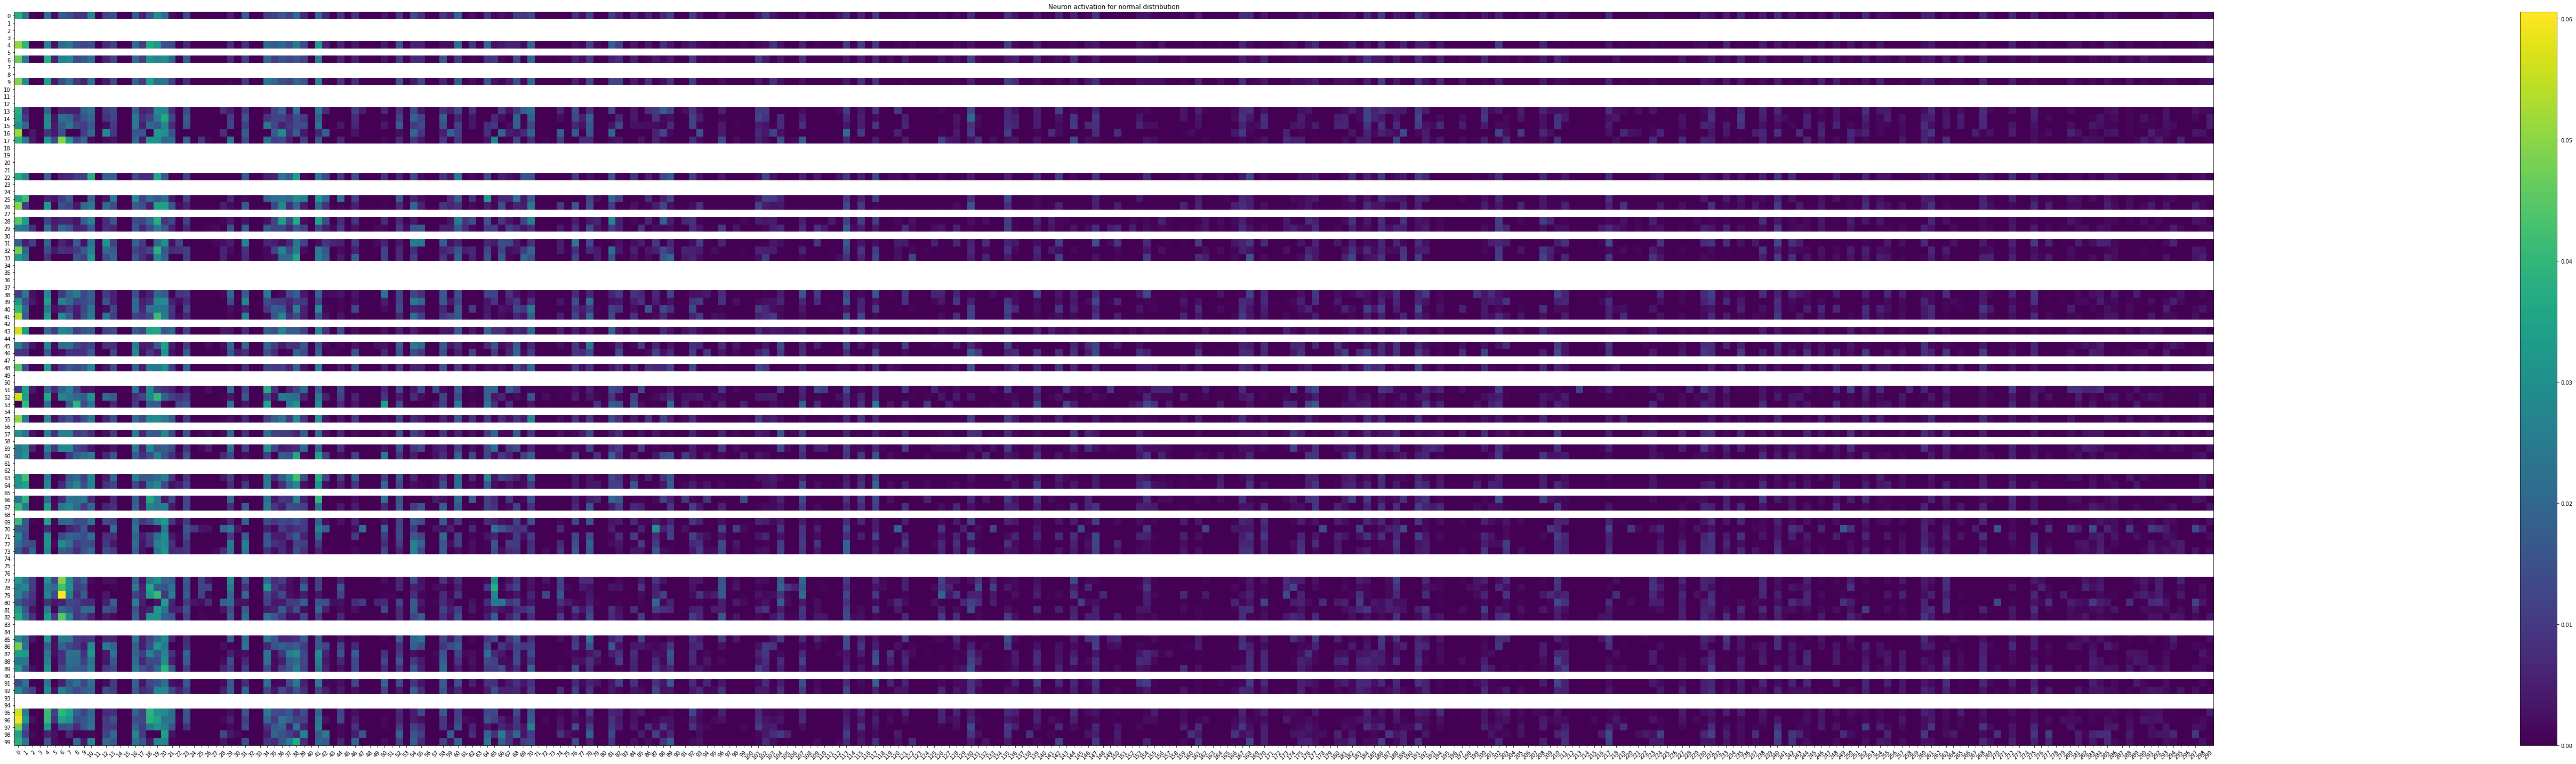

In [ ]:
avg_activation = compute_model_activations(model, mode='test')
plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for normal distribution', 160, 20)

# Uniform distribution

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.42E-01


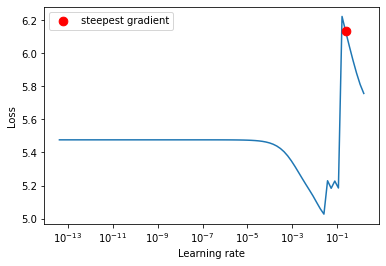

In [ ]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [30,30,30,30,30,30,30,30,30,30]

model = ModularFC(27, dimList, 100)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

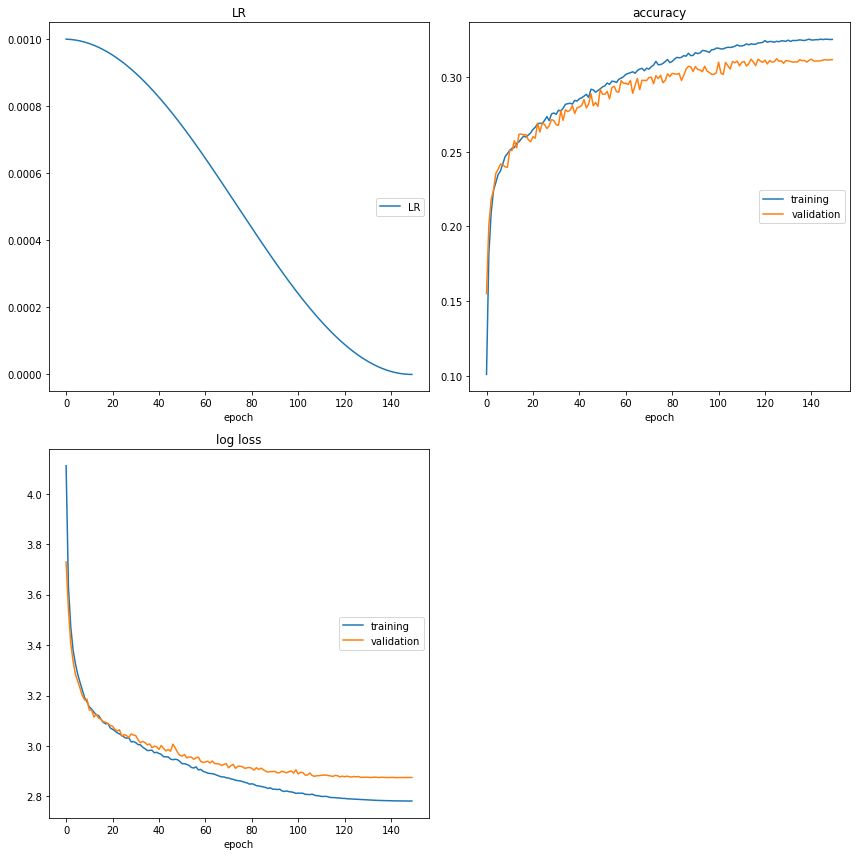

LR
	LR               	 (min:    0.000, max:    0.001, cur:    0.000)
accuracy
	training         	 (min:    0.101, max:    0.325, cur:    0.325)
	validation       	 (min:    0.155, max:    0.312, cur:    0.312)
log loss
	training         	 (min:    2.781, max:    4.111, cur:    2.781)
	validation       	 (min:    2.874, max:    3.730, cur:    2.875)


In [ ]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
num_epochs = 150
lr_list = [1E-03]
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/src/utils.py:120: RuntimeWarning: invalid value encountered in true_divide
  avg_saliency = avg_saliency / row_sums[:, np.newaxis]


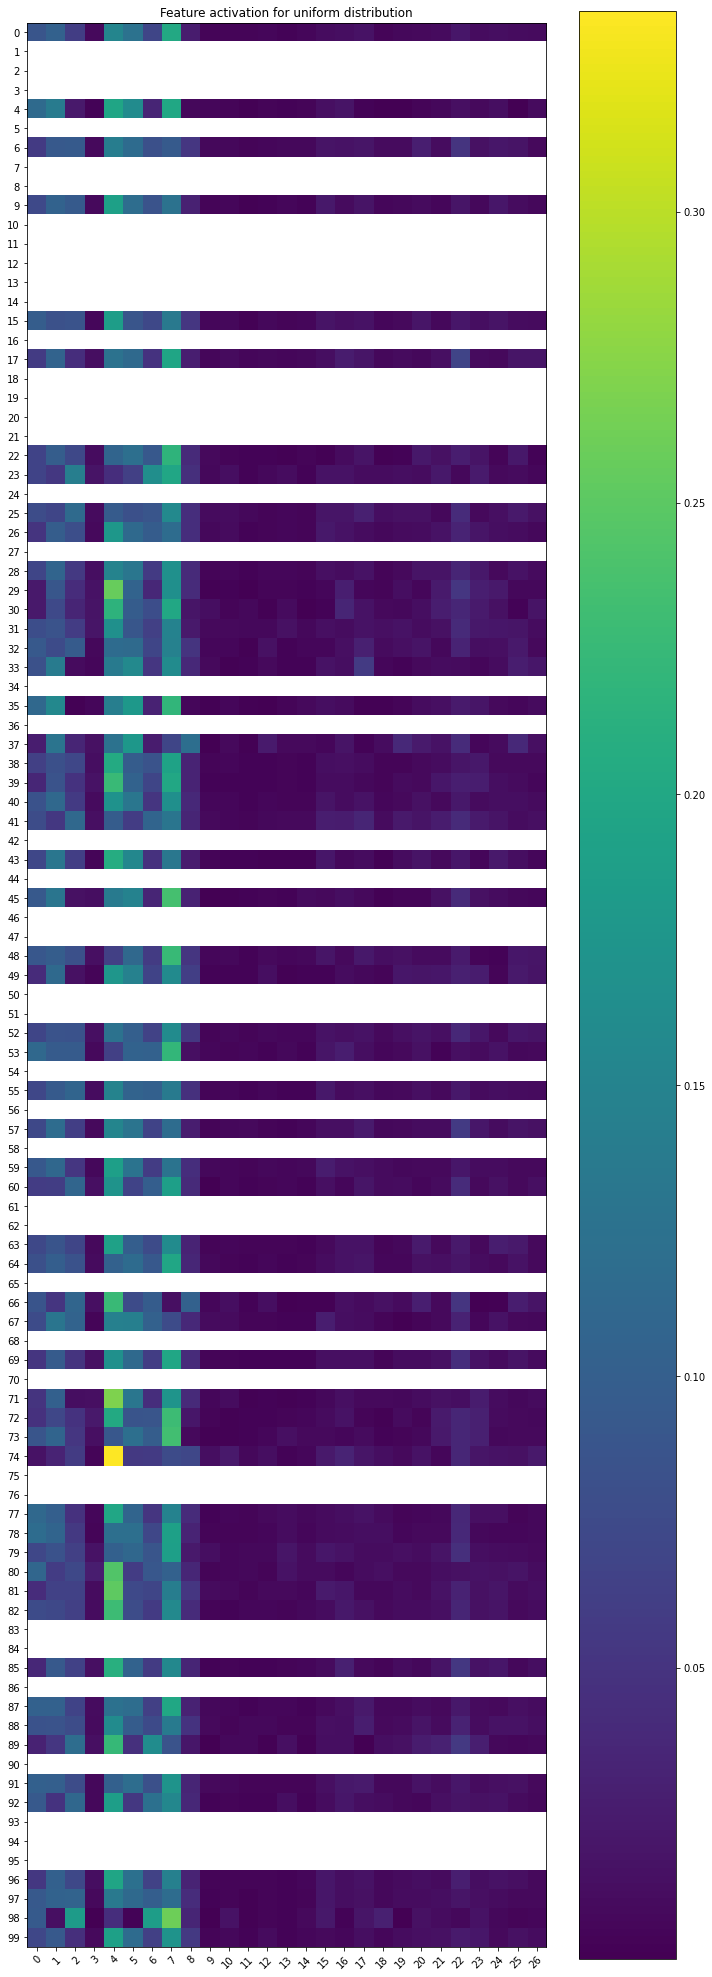

In [ ]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test')
plot_saliency_by_features(avg_saliency, 100, 27, fig_title='Feature activation for uniform distribution')

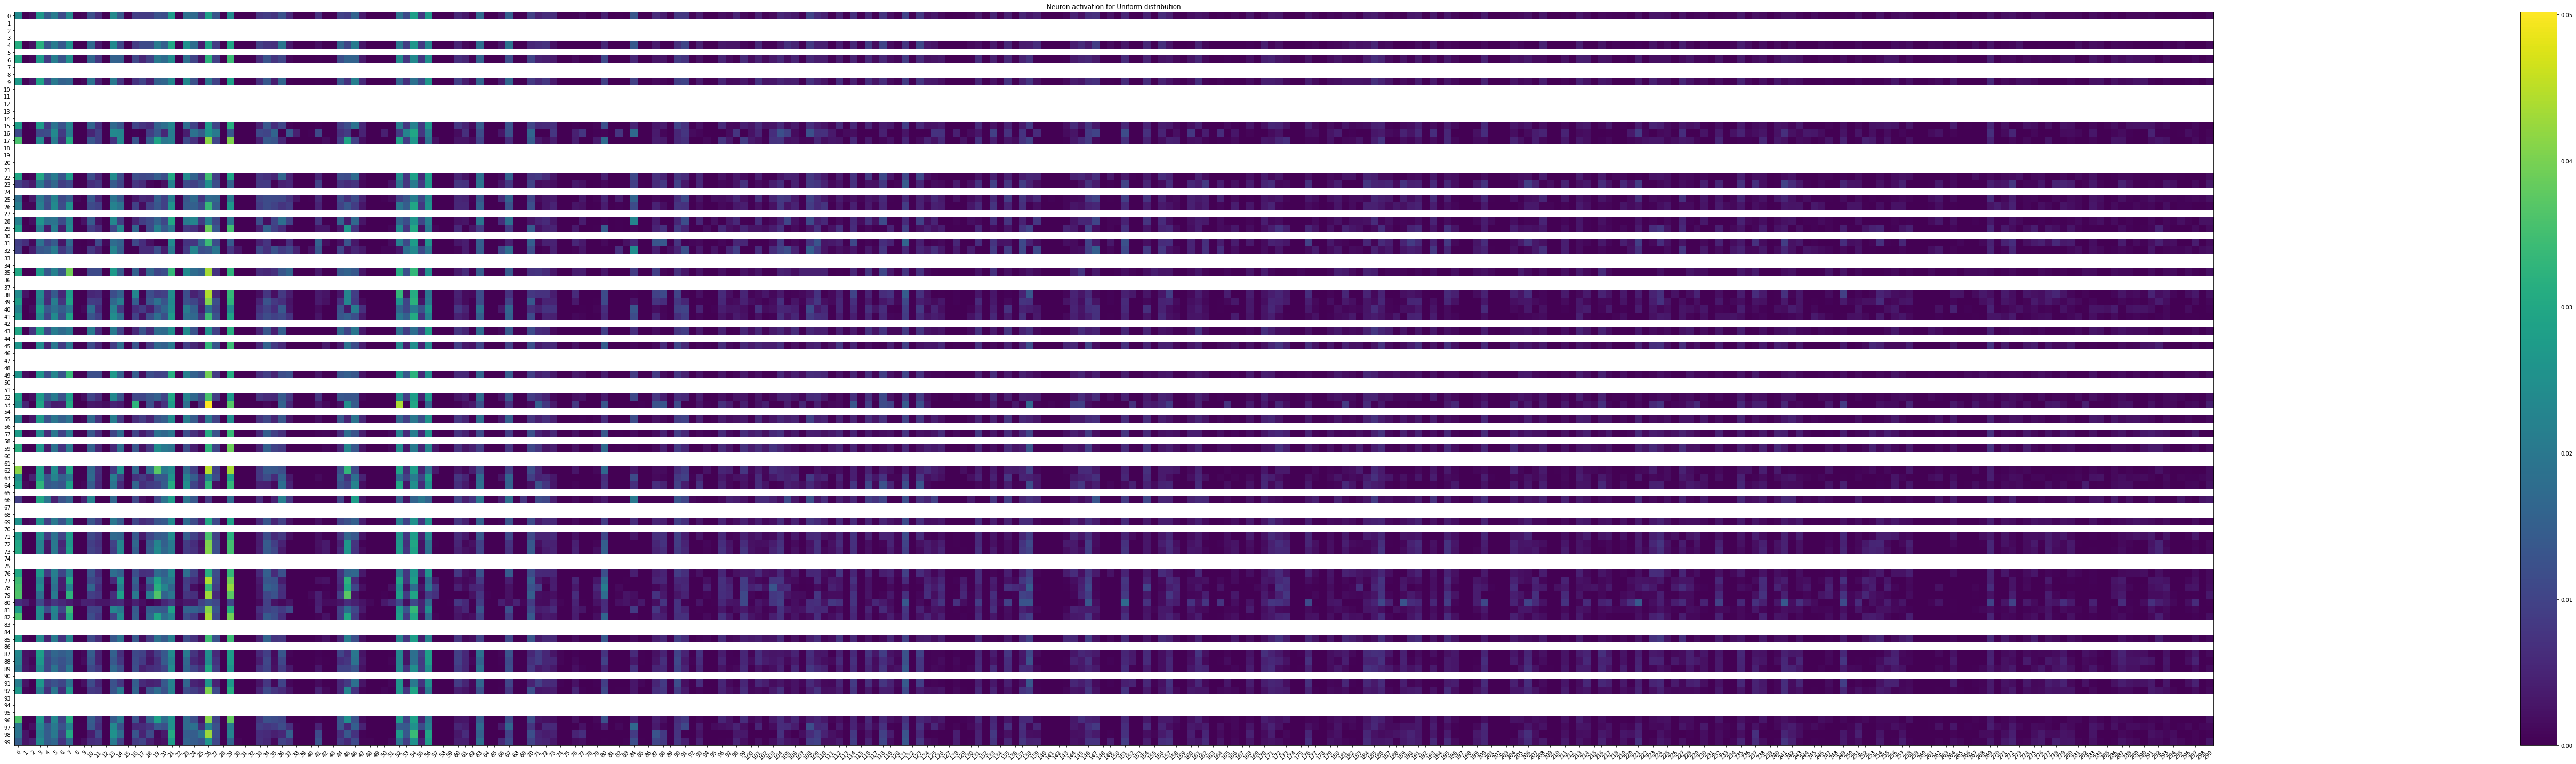

In [ ]:
avg_activation = compute_model_activations(model, mode='test')
plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for Uniform distribution', 160, 20)

## Left skewed

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.51E-01


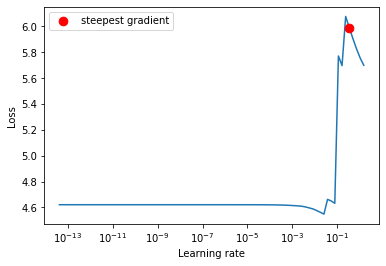

In [ ]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [20,40,55,35,30,30,25,25,20,20]

model = ModularFC(27, dimList, 100)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

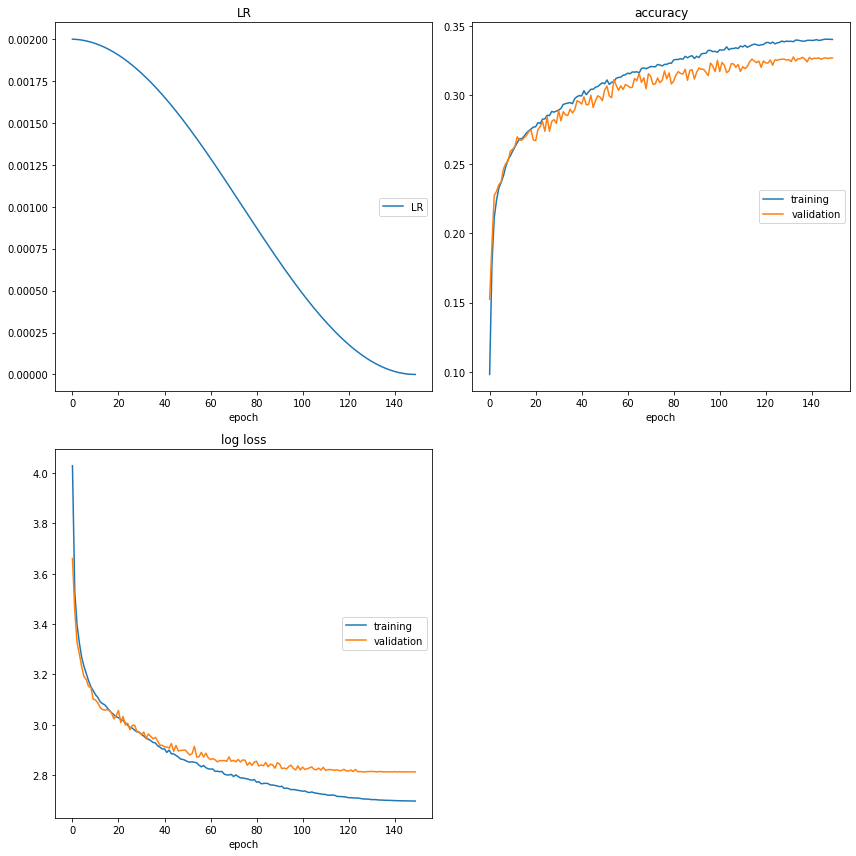

LR
	LR               	 (min:    0.000, max:    0.002, cur:    0.000)
accuracy
	training         	 (min:    0.098, max:    0.340, cur:    0.340)
	validation       	 (min:    0.152, max:    0.327, cur:    0.327)
log loss
	training         	 (min:    2.697, max:    4.029, cur:    2.697)
	validation       	 (min:    2.812, max:    3.661, cur:    2.813)


In [ ]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [2E-03]
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/src/utils.py:120: RuntimeWarning: invalid value encountered in true_divide
  avg_saliency = avg_saliency / row_sums[:, np.newaxis]


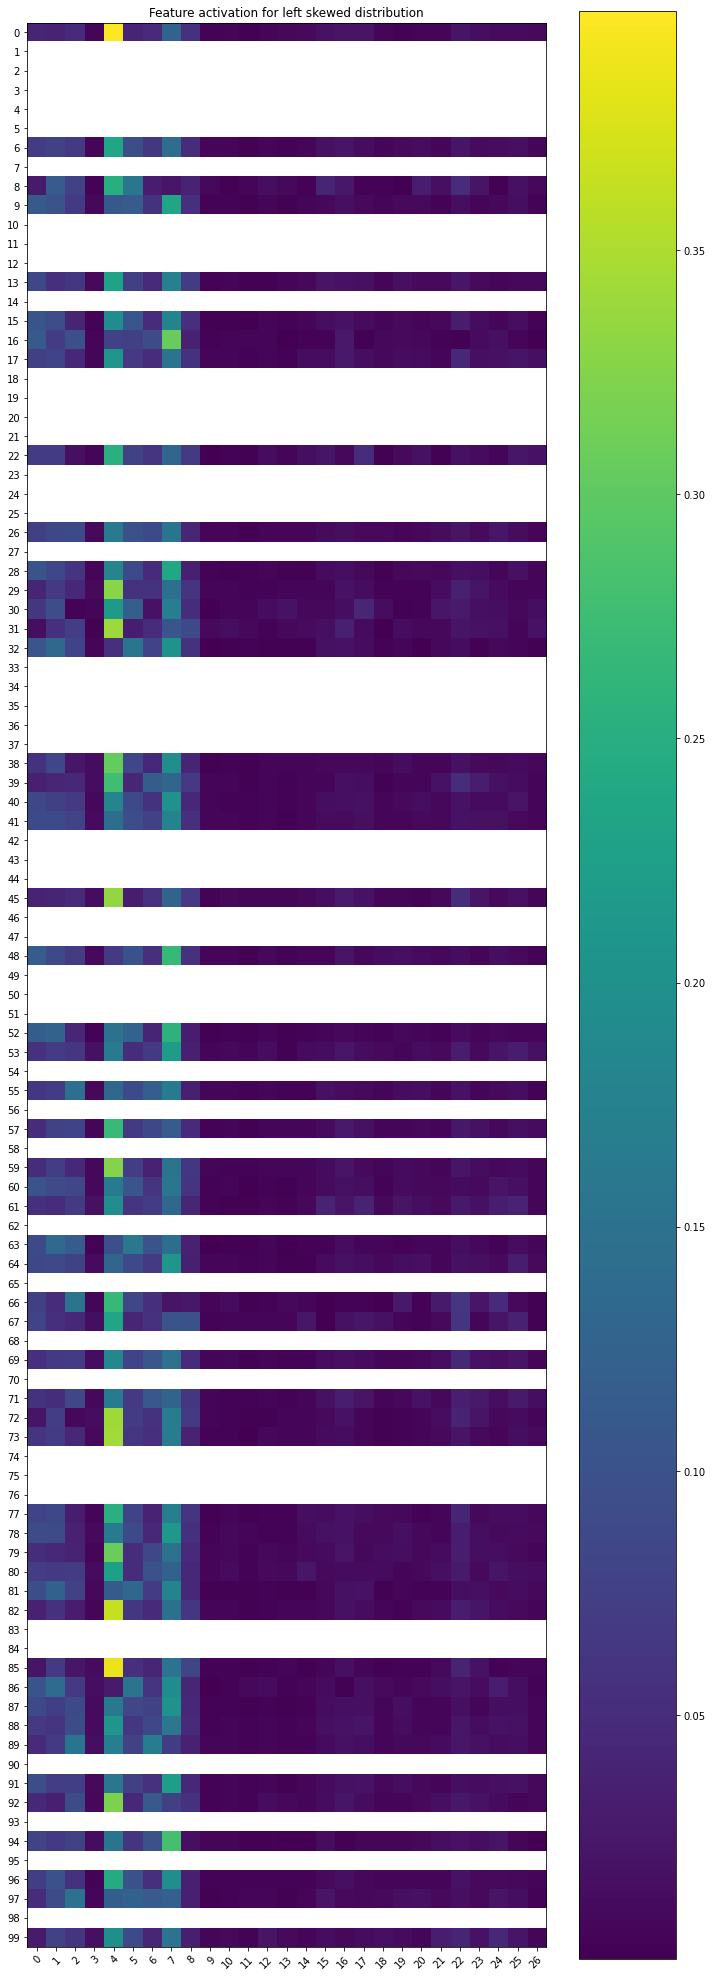

In [ ]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test')
plot_saliency_by_features(avg_saliency, 100, 27, fig_title='Feature activation for left skewed distribution')

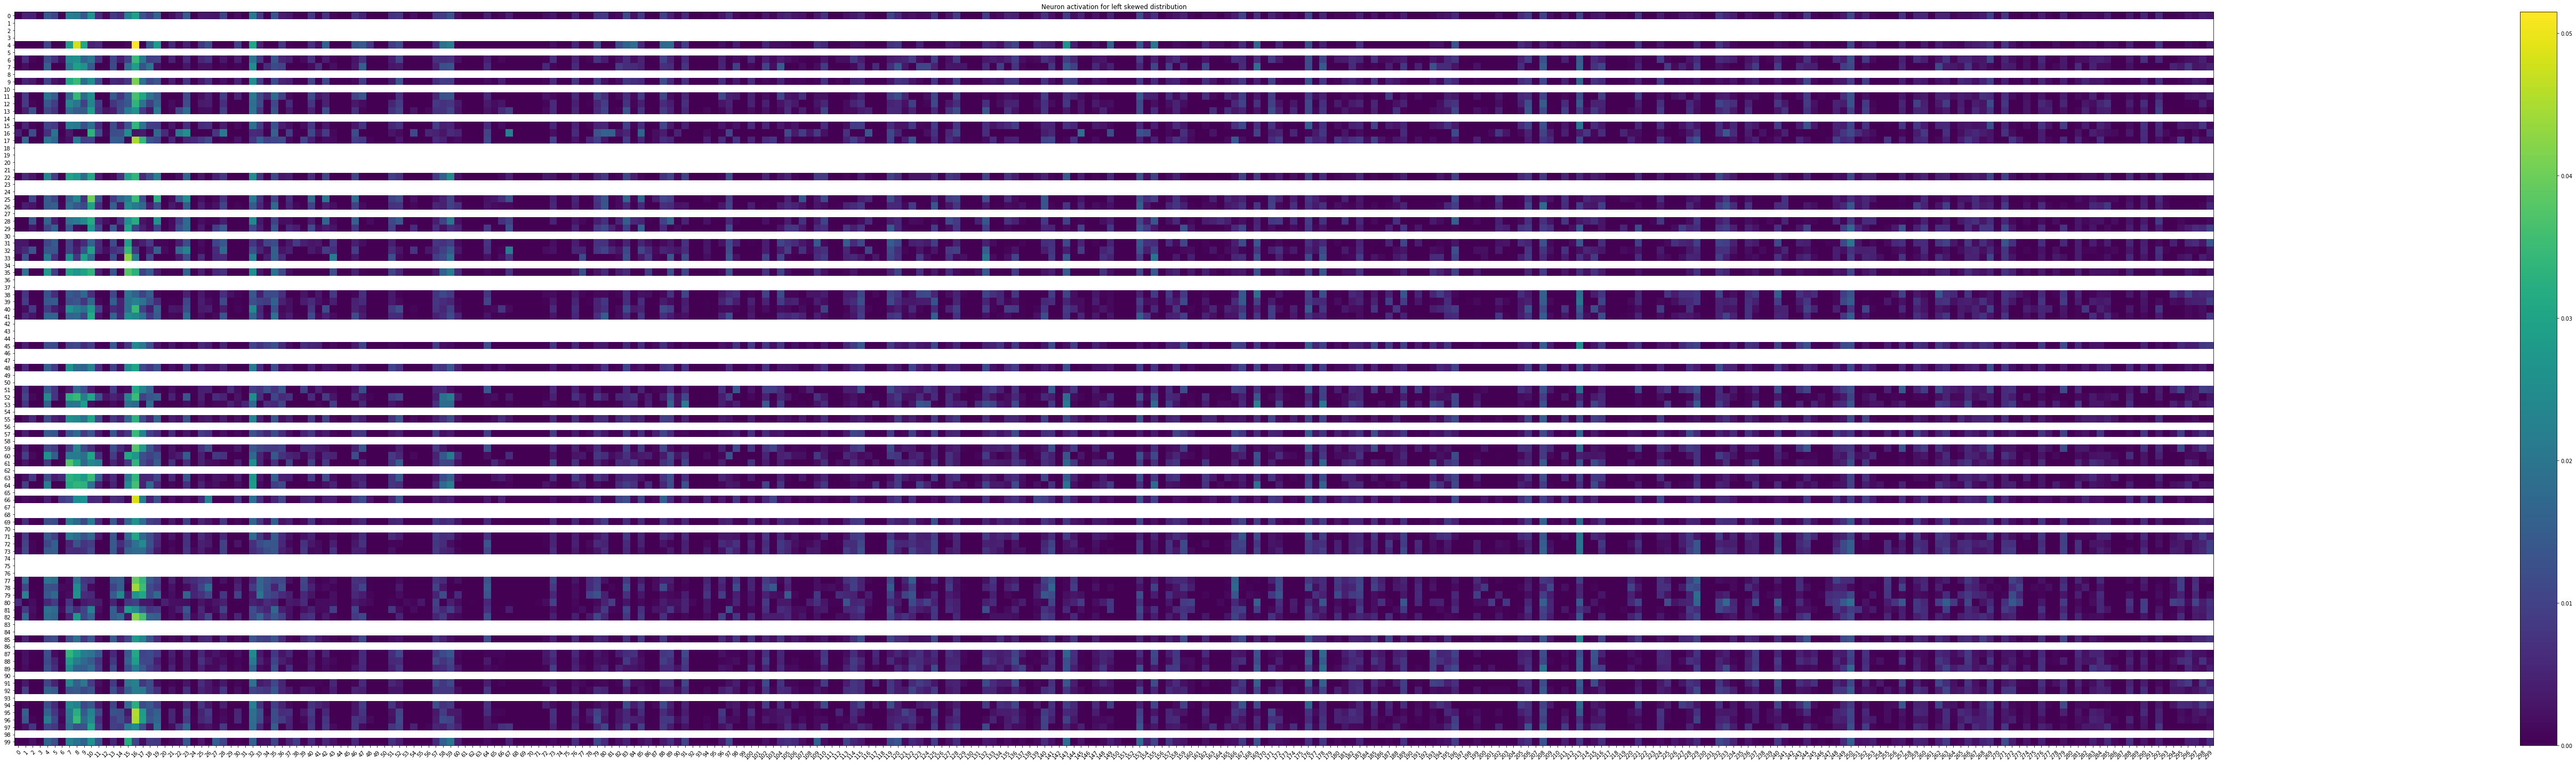

In [ ]:
avg_activation = compute_model_activations(model, mode='test')
plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for left skewed distribution', 160, 20)

## Right Skewed

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.56E+00


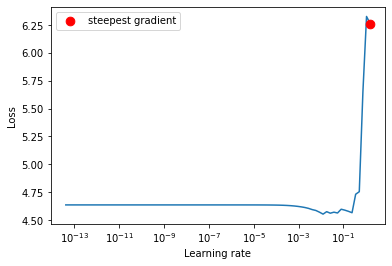

In [ ]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [20,40,55,35,30,30,25,25,20,20]
dimList = list(reversed(dimList))
model = ModularFC(27, dimList, 100)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

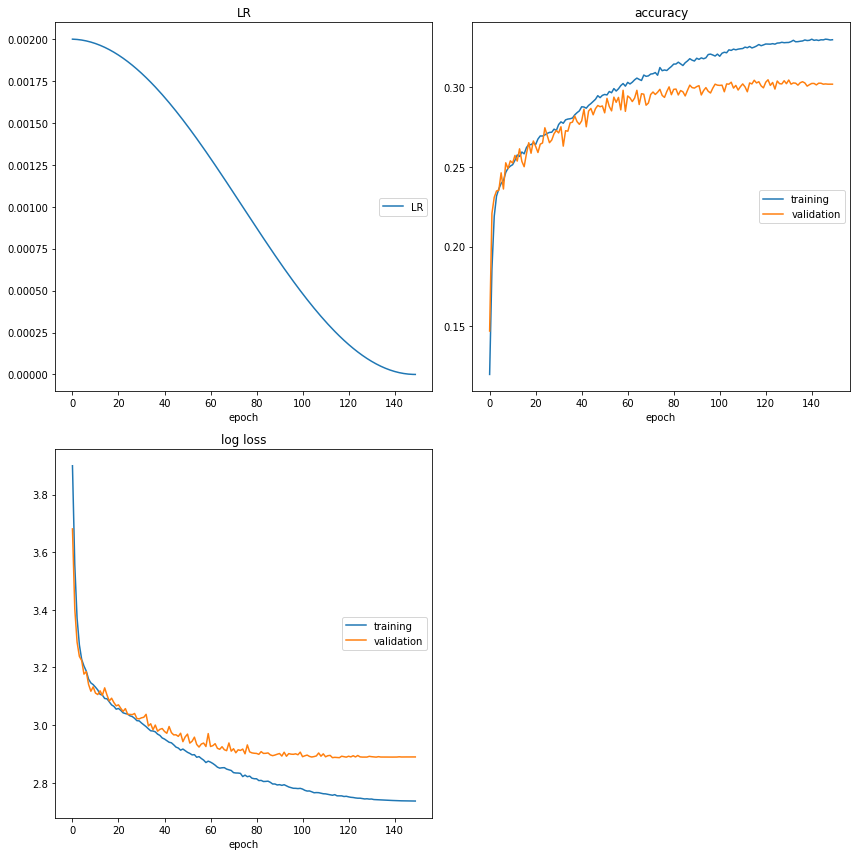

LR
	LR               	 (min:    0.000, max:    0.002, cur:    0.000)
accuracy
	training         	 (min:    0.120, max:    0.330, cur:    0.330)
	validation       	 (min:    0.147, max:    0.304, cur:    0.302)
log loss
	training         	 (min:    2.736, max:    3.900, cur:    2.736)
	validation       	 (min:    2.887, max:    3.681, cur:    2.889)


In [ ]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [2E-03]
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/src/utils.py:120: RuntimeWarning: invalid value encountered in true_divide
  avg_saliency = avg_saliency / row_sums[:, np.newaxis]


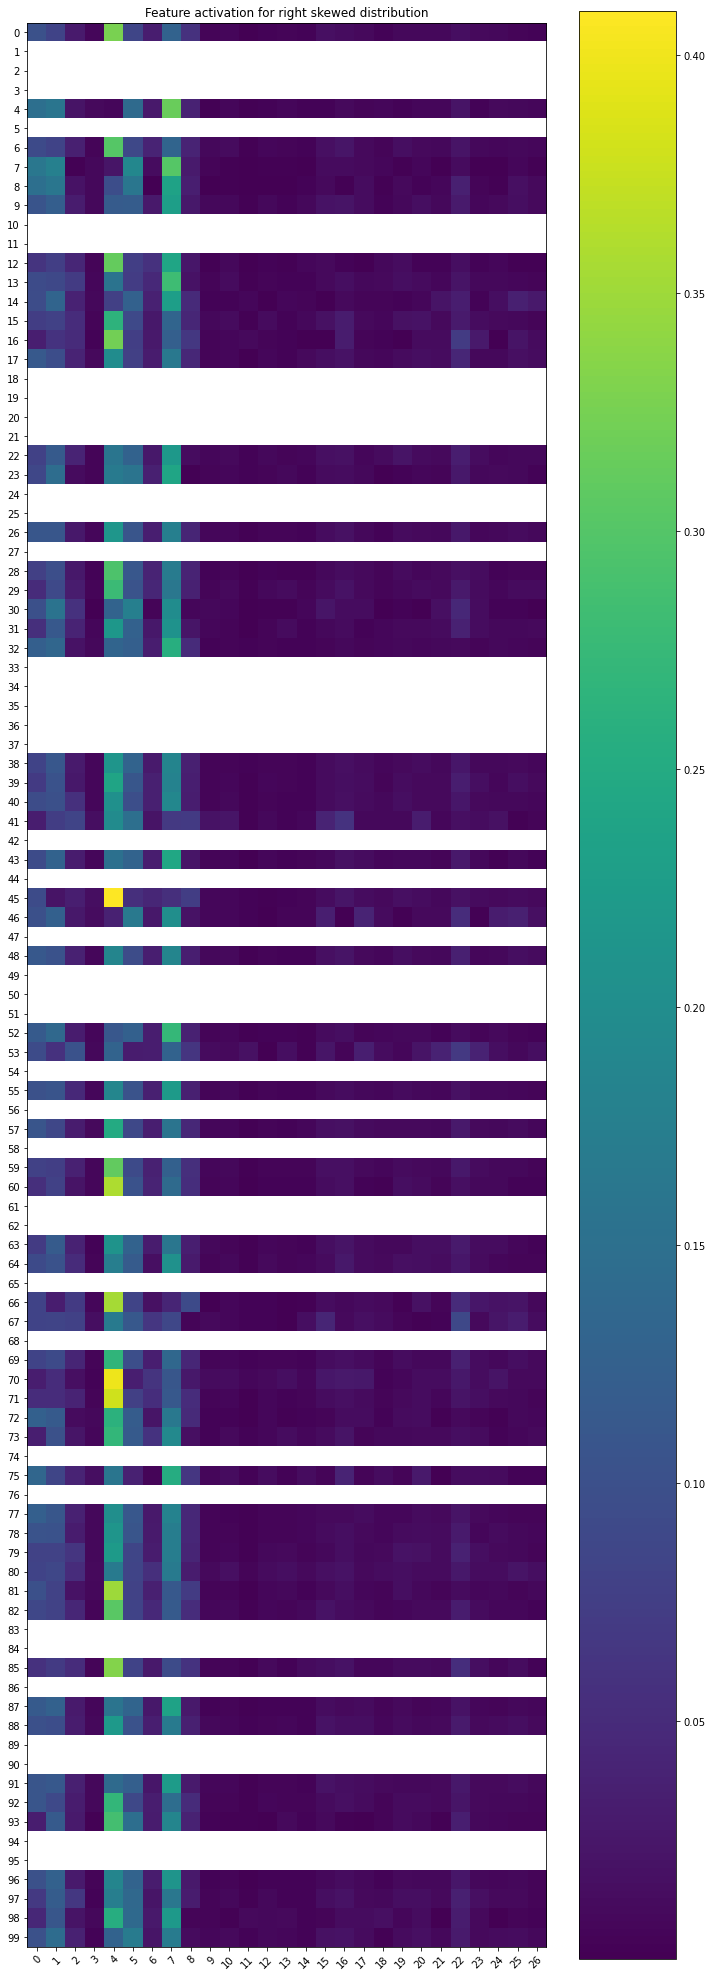

In [ ]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test')
plot_saliency_by_features(avg_saliency, 100, 27, fig_title='Feature activation for right skewed distribution')

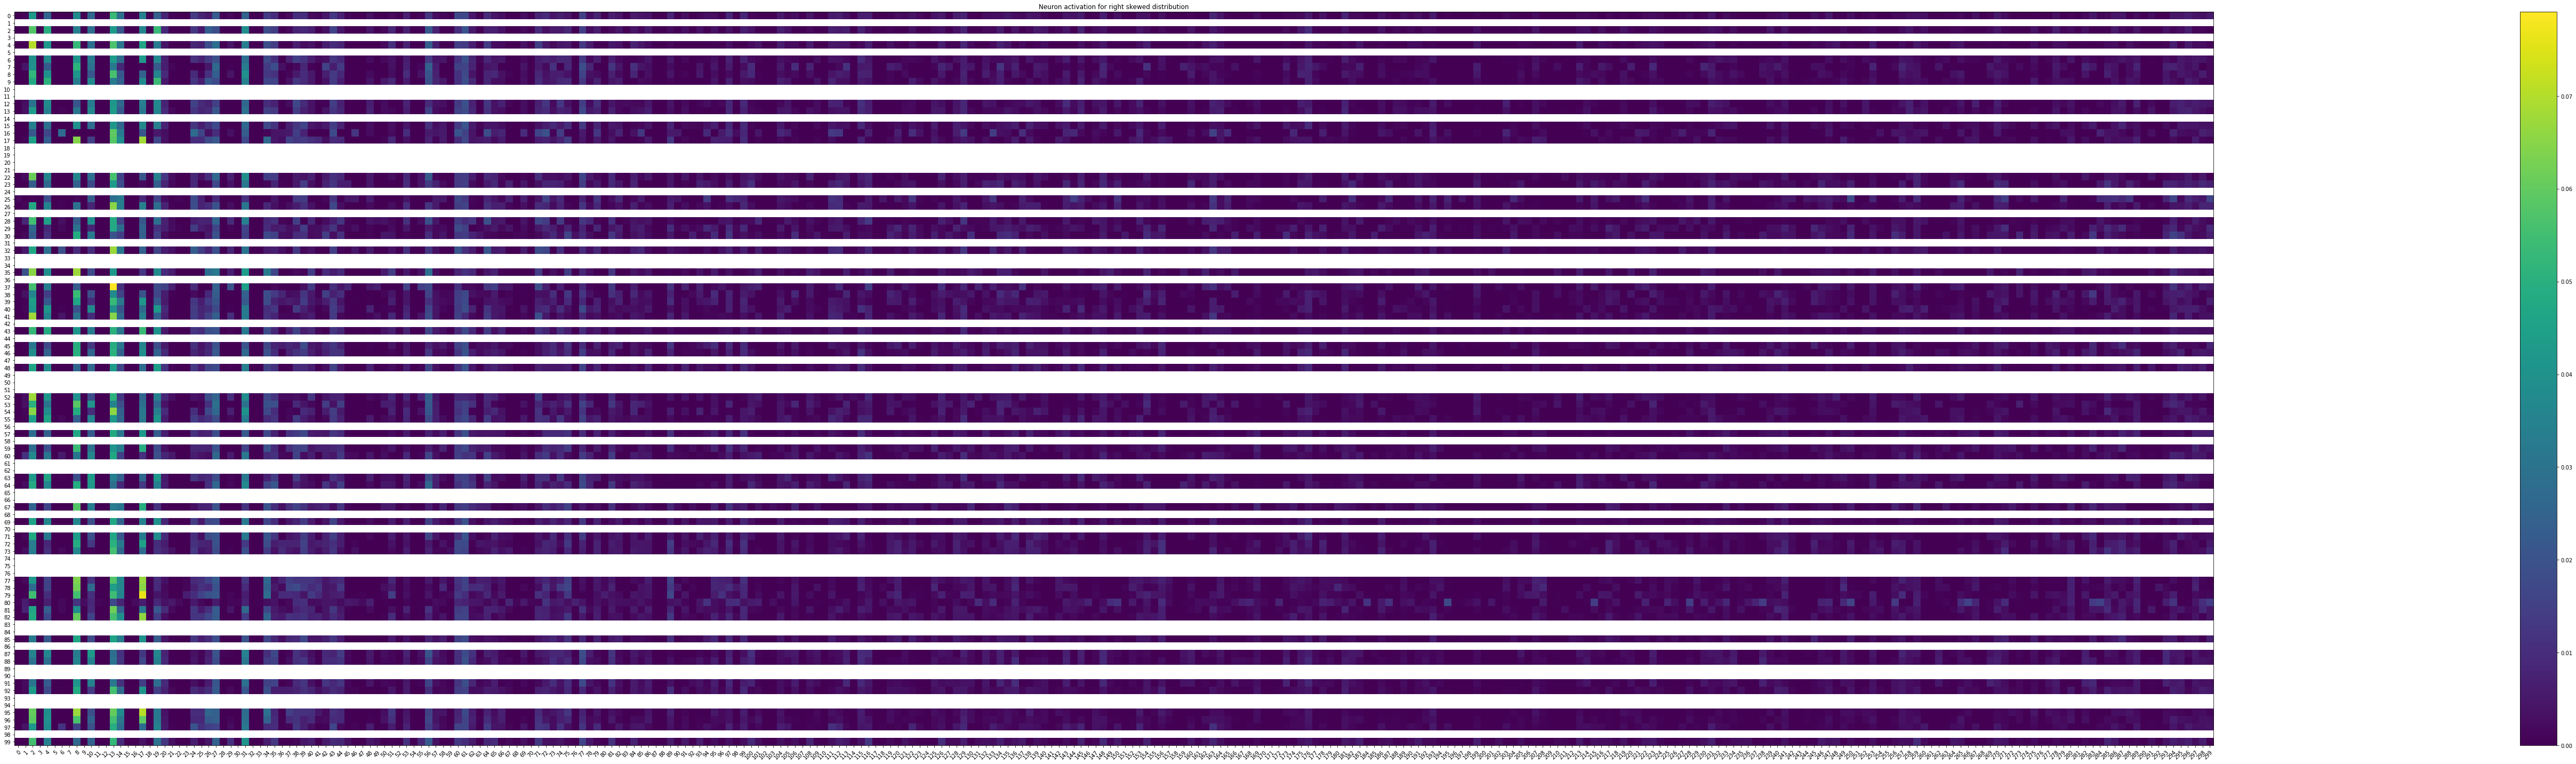

In [ ]:
avg_activation = compute_model_activations(model, mode='test')
plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for right skewed distribution', 160, 20)

## Left open

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.07E+00


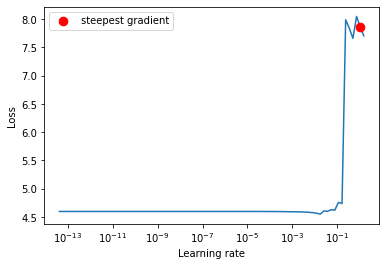

In [ ]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [45,40,35,35,30,30,25,25,20,15]

model = ModularFC(27, dimList, 100)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

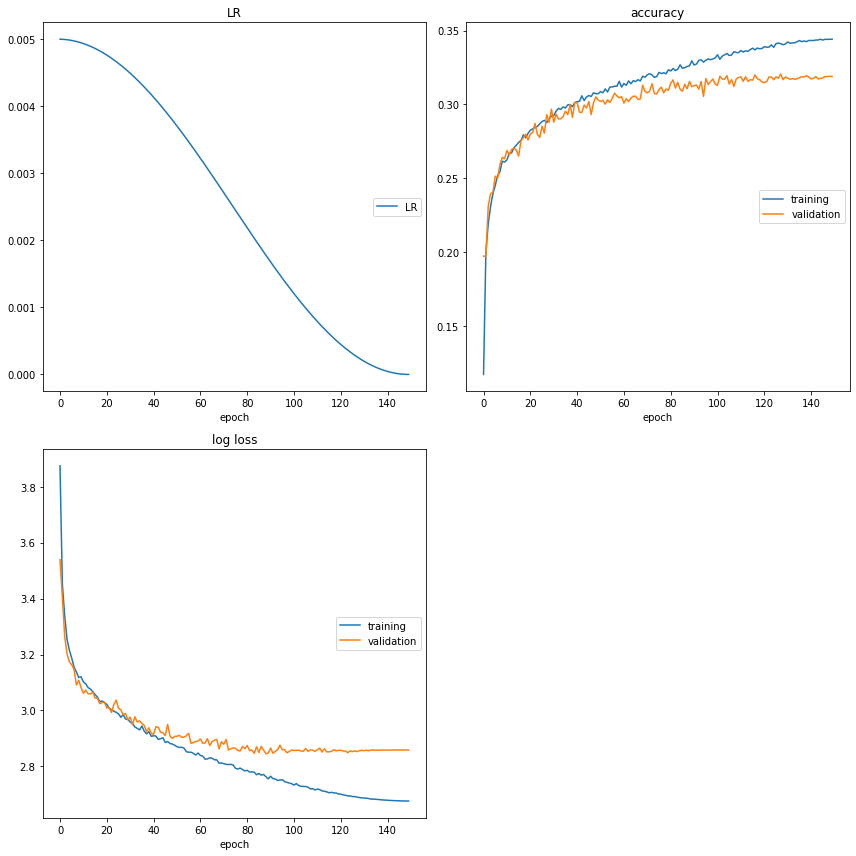

LR
	LR               	 (min:    0.000, max:    0.005, cur:    0.000)
accuracy
	training         	 (min:    0.117, max:    0.344, cur:    0.344)
	validation       	 (min:    0.197, max:    0.321, cur:    0.319)
log loss
	training         	 (min:    2.676, max:    3.875, cur:    2.676)
	validation       	 (min:    2.845, max:    3.539, cur:    2.858)


In [ ]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [5E-03]
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/src/utils.py:120: RuntimeWarning: invalid value encountered in true_divide
  avg_saliency = avg_saliency / row_sums[:, np.newaxis]


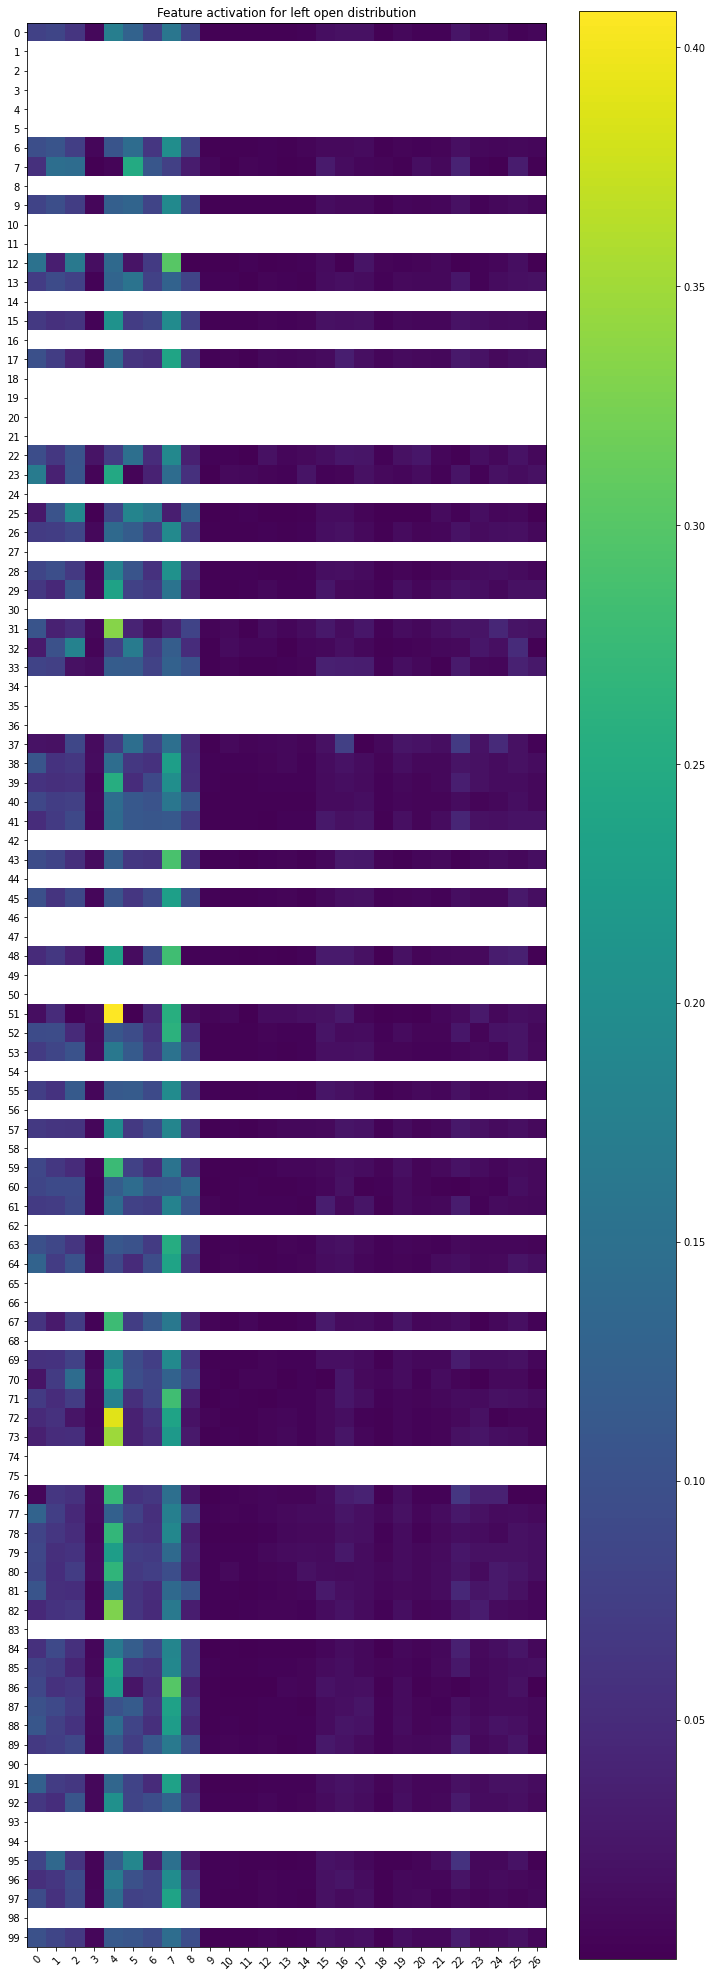

In [ ]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test')
plot_saliency_by_features(avg_saliency, 100, 27, fig_title='Feature activation for left open distribution')

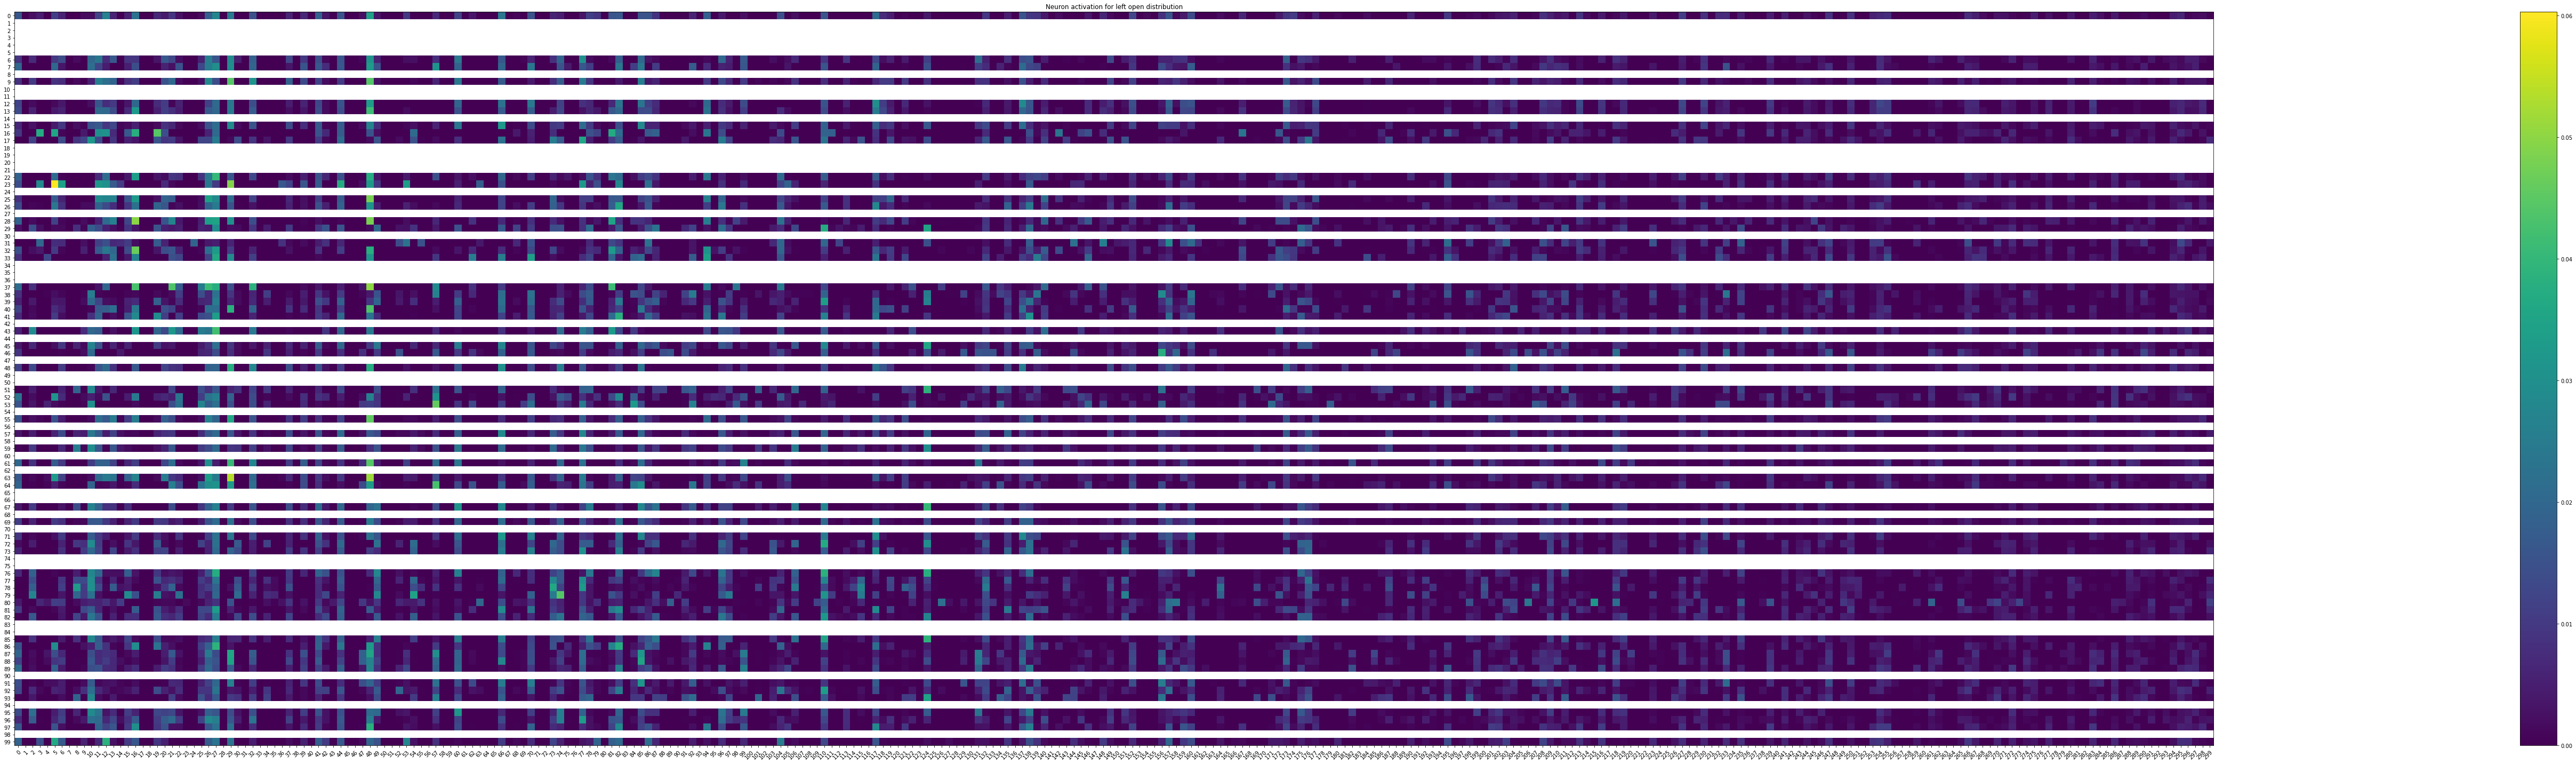

In [ ]:
avg_activation = compute_model_activations(model, mode='test')
plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for left open distribution', 160, 20)

# Right open

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.42E-01


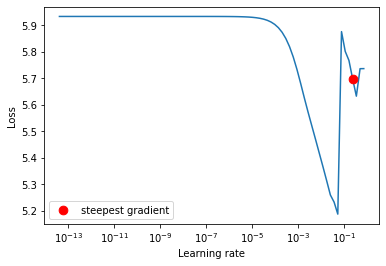

In [ ]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [45,40,35,35,30,30,25,25,20,15]
dimList = list(reversed(dimList))
model = ModularFC(27, dimList, 100)
# model = FC_10(27, 100, dimList)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

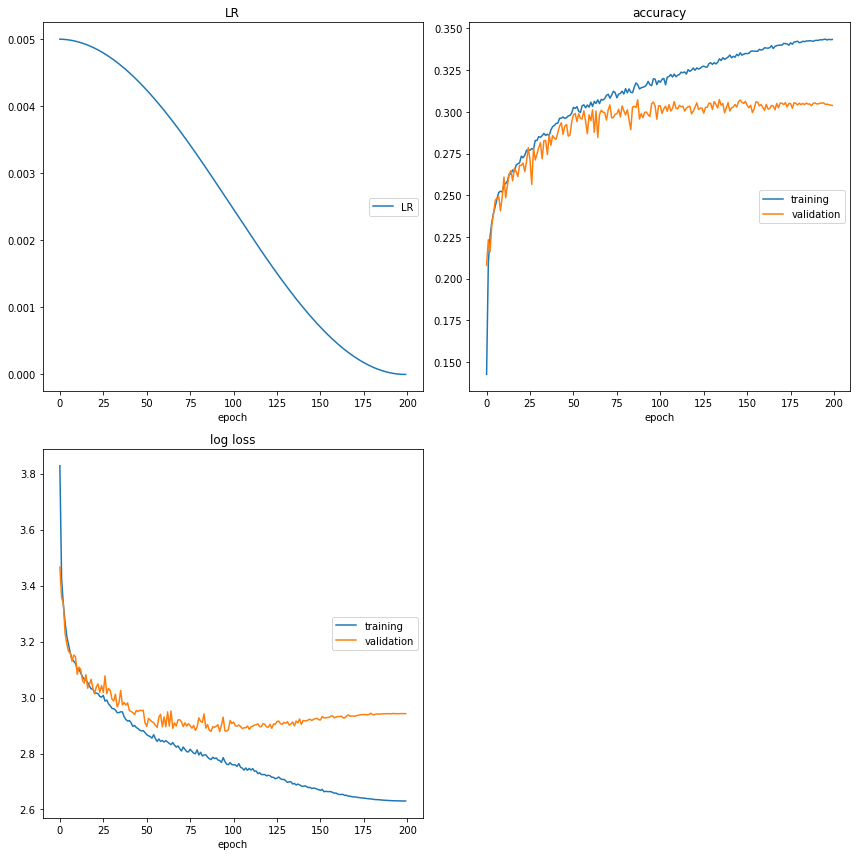

LR
	LR               	 (min:    0.000, max:    0.005, cur:    0.000)
accuracy
	training         	 (min:    0.143, max:    0.344, cur:    0.343)
	validation       	 (min:    0.208, max:    0.307, cur:    0.304)
log loss
	training         	 (min:    2.630, max:    3.828, cur:    2.630)
	validation       	 (min:    2.879, max:    3.466, cur:    2.942)


In [ ]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [5E-03]
num_epochs=200
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/src/utils.py:120: RuntimeWarning: invalid value encountered in true_divide
  avg_saliency = avg_saliency / row_sums[:, np.newaxis]


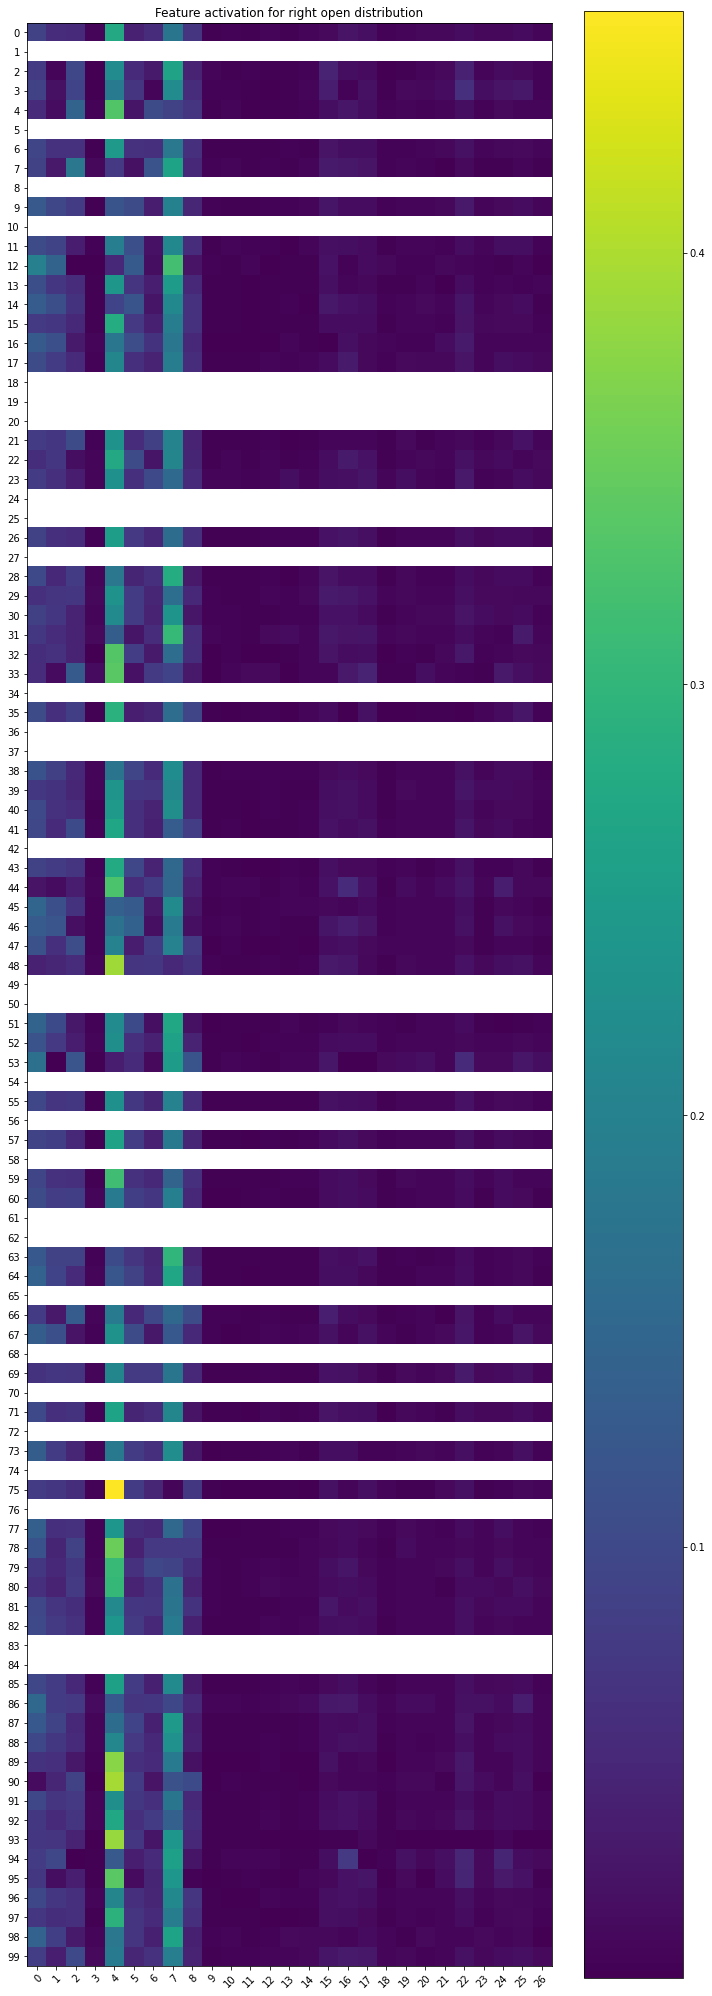

In [ ]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test')
plot_saliency_by_features(avg_saliency, 100, 27, fig_title='Feature activation for right open distribution')

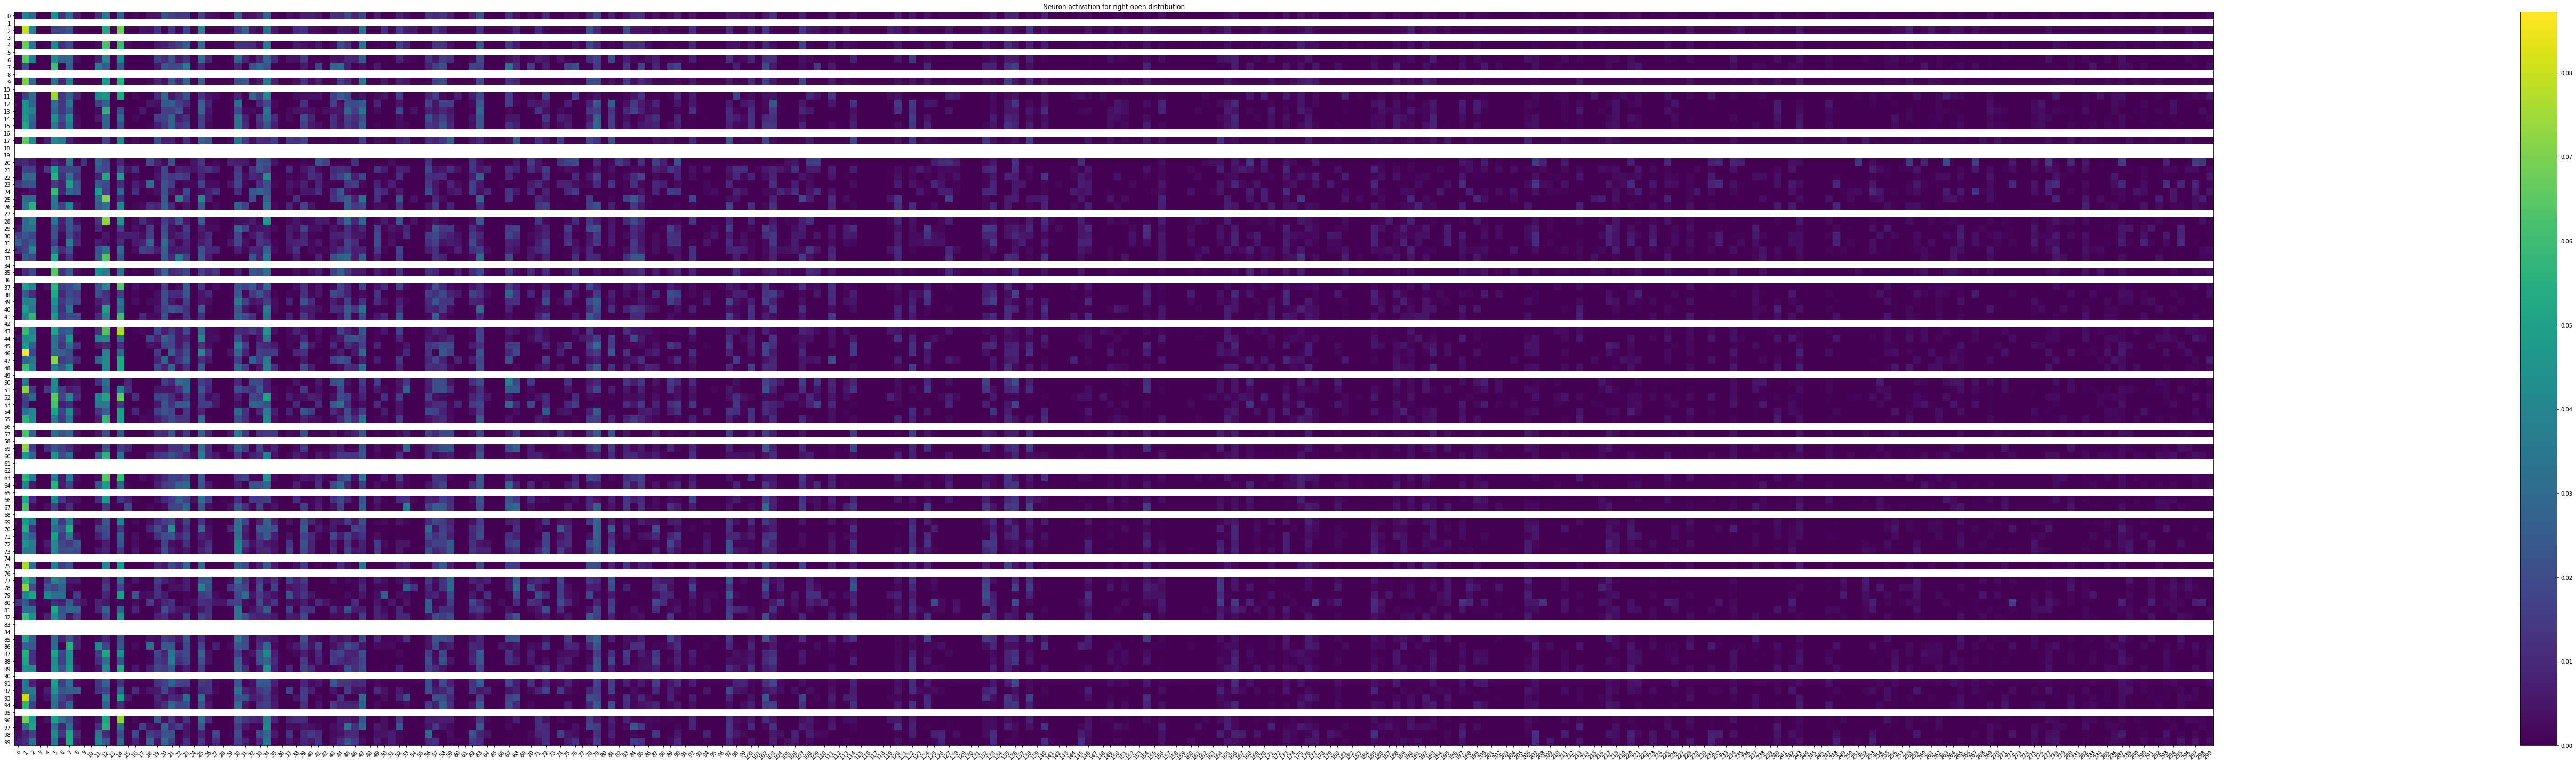

In [ ]:
avg_activation = compute_model_activations(model, mode='test')
plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for right open distribution', 160, 20)

# Bimodal

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 7.39E-01


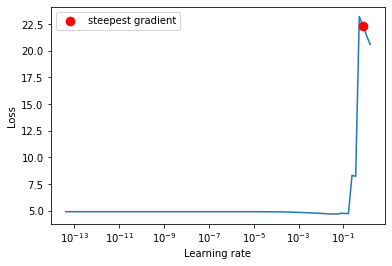

In [ ]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [20,30,40,35,25,25,35,40,30,20]

model = ModularFC(27, dimList, 100)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

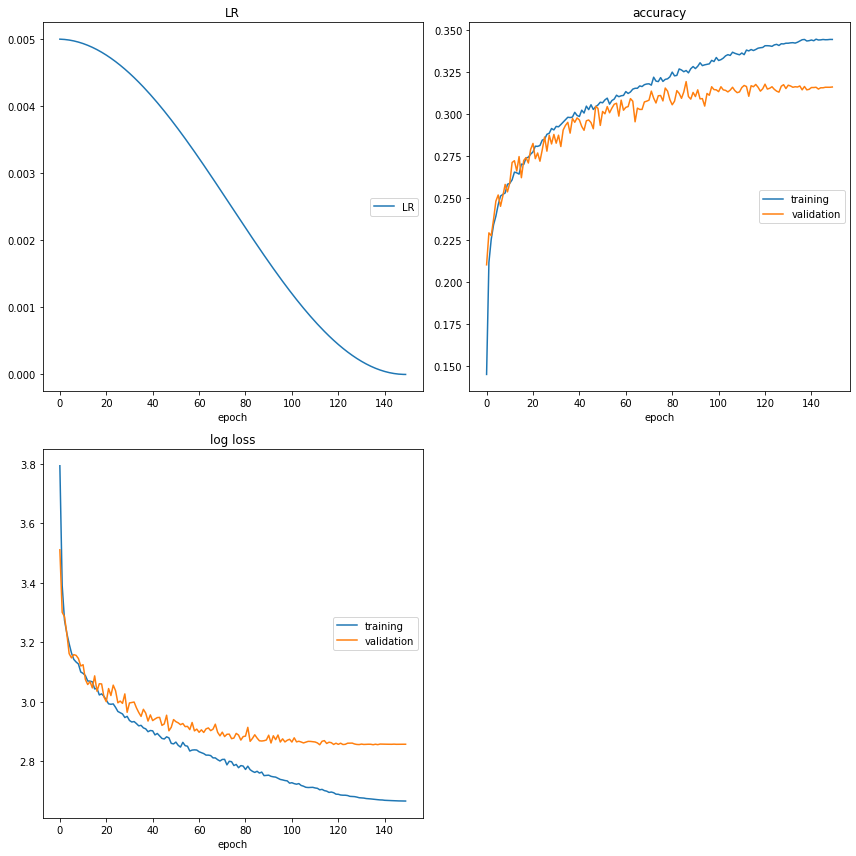

LR
	LR               	 (min:    0.000, max:    0.005, cur:    0.000)
accuracy
	training         	 (min:    0.145, max:    0.345, cur:    0.344)
	validation       	 (min:    0.210, max:    0.319, cur:    0.316)
log loss
	training         	 (min:    2.666, max:    3.794, cur:    2.666)
	validation       	 (min:    2.856, max:    3.511, cur:    2.857)


In [ ]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [5E-03]
num_epochs=150
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

<class 'src.helenaDataset.helenaDataset'> <src.helenaDataset.helenaDataset object at 0x7f19b60924d0>


/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/src/utils.py:130: RuntimeWarning: invalid value encountered in true_divide
  avg_saliency = avg_saliency / row_sums[:, np.newaxis]


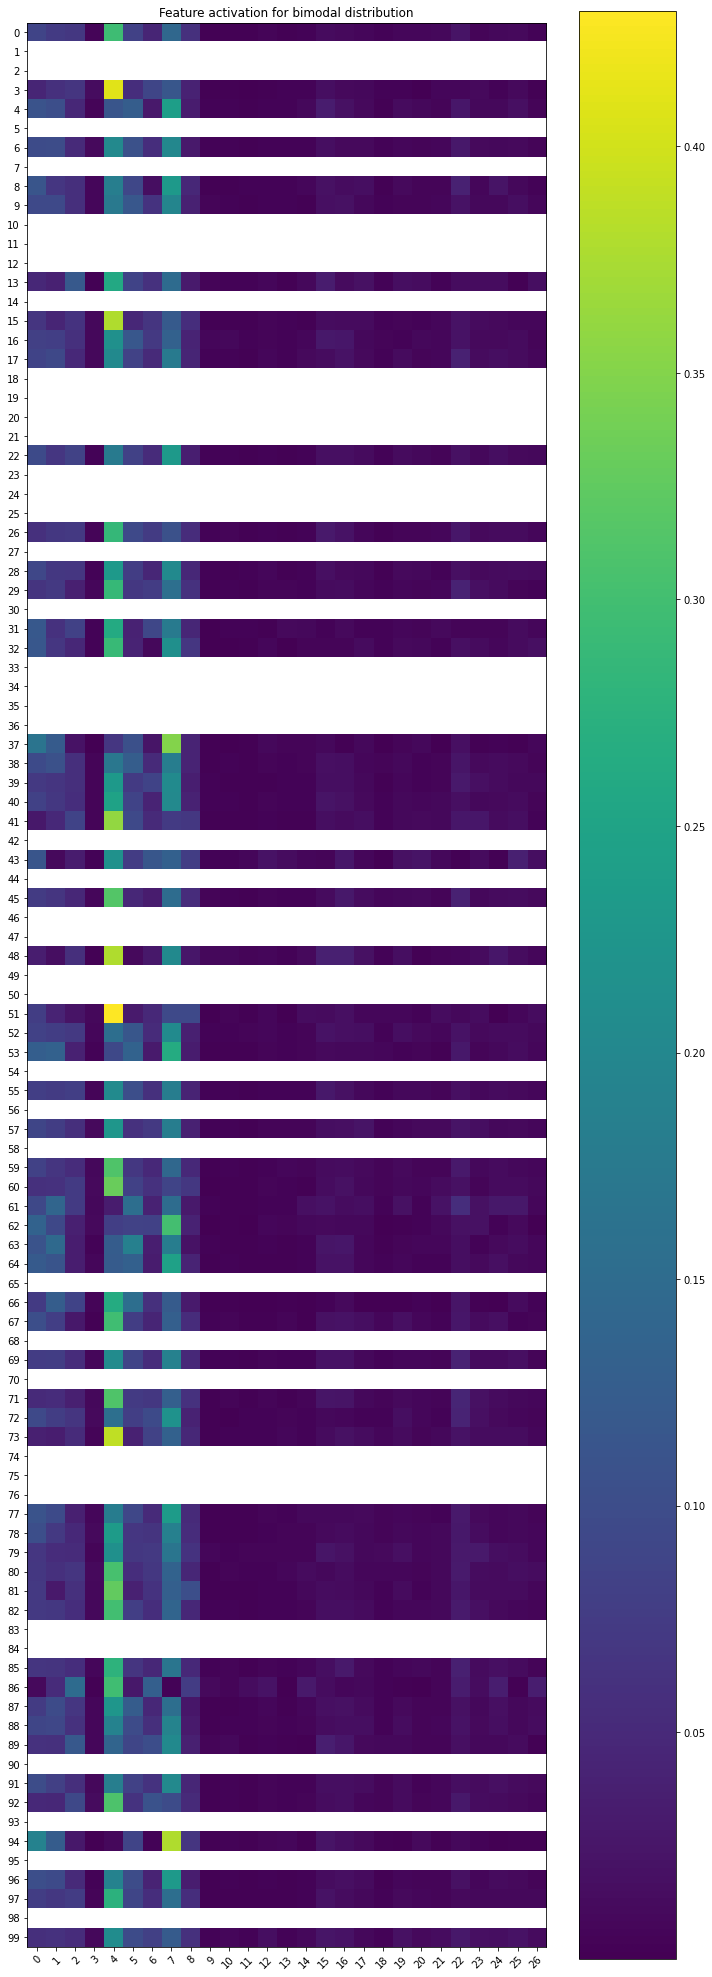

In [ ]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test')
plot_saliency_by_features(avg_saliency, 100, 27, fig_title='Feature activation for bimodal distribution')

<class 'src.helenaDataset.helenaDataset'> <src.helenaDataset.helenaDataset object at 0x7f19b481fe90>


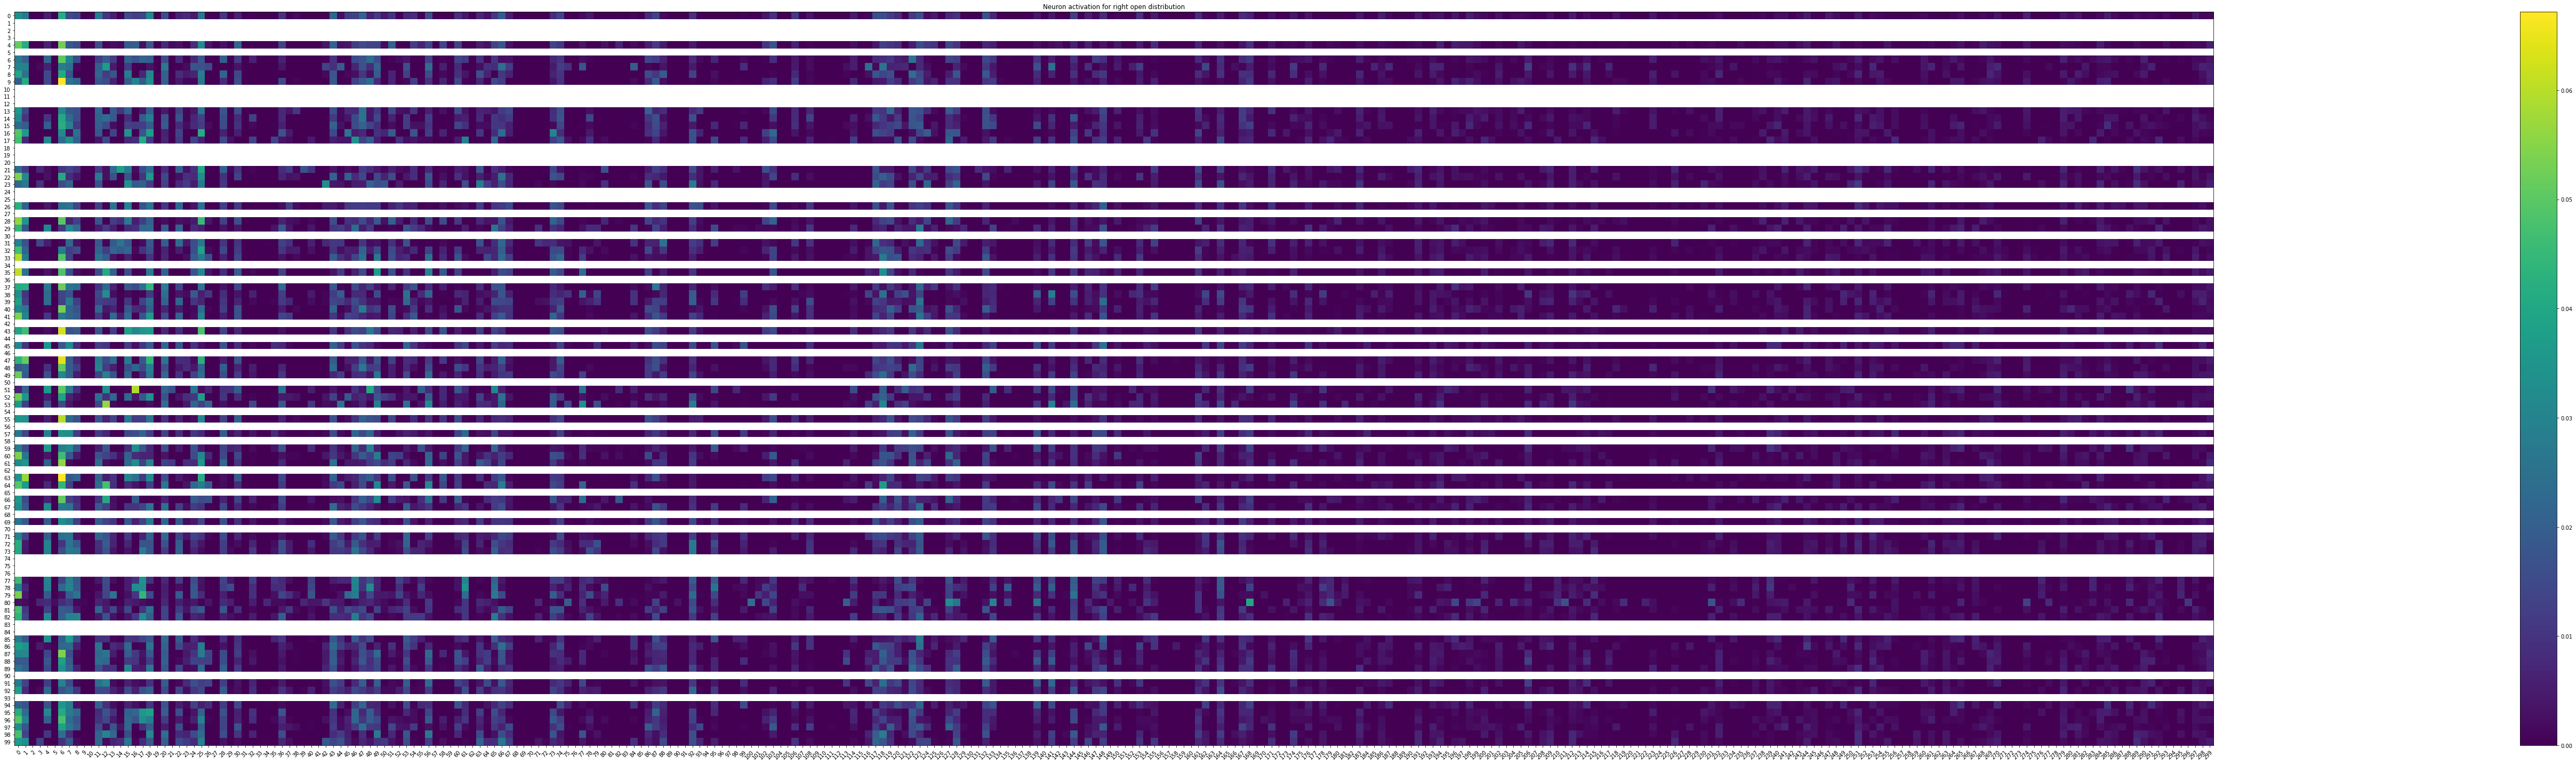

In [ ]:
avg_activation = compute_model_activations(model, mode='test')
plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for right open distribution', 160, 20)

# Experiments

In [ ]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [45,40,35,35,30,30,25,25,20,15]
dimList = list(reversed(dimList))
model = ModularFC(27, dimList, 100)
# model = FC_10(27, 100, dimList)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [5E-03]
num_epochs=50
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)

In [ ]:
avg_activation = compute_model_paramters(model, mode='test')
plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for right open distribution', 160, 20)

In [ ]:
len(avg_activation)

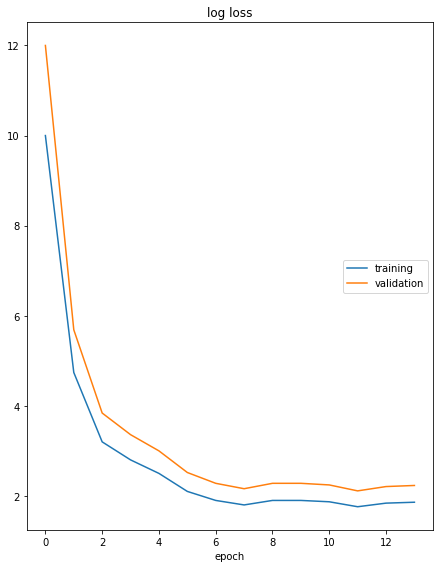

log loss
	training         	 (min:    1.760, max:   10.000, cur:    1.860)
	validation       	 (min:    2.112, max:   12.000, cur:    2.232)


In [7]:

!pip install livelossplot --quiet
from livelossplot import PlotLosses
import matplotlib.pyplot as plt

liveloss = PlotLosses()
logs = {}

loss_list = [10,4.74,3.2,2.8,2.5,2.1,1.9,1.8,1.9,1.9,1.87,1.76,1.84,1.86]
valloss_list = [10,4.74,3.2,2.8,2.5,2.1,1.9,1.8,1.9,1.9,1.87,1.76,1.84,1.86]

for train_loss, val_loss in zip(loss_list, valloss_list):
  logs['log loss'] = train_loss
  logs['val_log loss'] = val_loss

  liveloss.update(logs)
  liveloss.send()